# Test Assignment:2 - 
## Task1. 
### Exploratory Data Analysis :
Number of words counted; Number of characters counted; Converted to lowercase; Removal of Punctuation; Customized replacement; Removal of Rare words;  Dropping duplicate tweets; Removed stop words; Customized stop words; Stemming; Lemmatization follwed by use of count vectorizer and tfidf vectorizer. I experimented with 4 versions of count vectorizer but settled on cv2 and cv3 for my analysis.

In [1]:
# A future statement must appear near the top of the module.
from __future__ import division

In [2]:
# importing module(s) into namespace
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pathname = ''
pd.set_option('display.max_colwidth', 15000) # maximum column for getting all the text


Before starting, let’s quickly read the tweets file from the dataset in order to perform different tasks on it. In the entire analysis, I'm using the twitter 'wall' dataset where I extracted tweets featuring #wall.

In [3]:
# Importing csv file
tweetdf = pd.read_csv(pathname + "wall.csv", index_col = 0) 
print(tweetdf.shape)
print(list(tweetdf)) #columns of a data frame
#print(tweetdf['tweetText'][:6])

(500, 12)
['tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation']


### tweetText column of tweet data frame is the center of attraction for my research work  here.
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

In [4]:
# Number of words in each tweet
# using the split function in python
tweetdf['word_count'] = tweetdf['tweetText'].apply(lambda x: len(str(x).split(" ")))
#tweetdf[['tweetText','word_count']].head()

### Number of characters
This feature is also based on the previous feature intuition. Here, calculating the number of characters in each tweet by calculating the length of the tweet.

In [5]:
tweetdf['char_count'] = tweetdf['tweetText'].str.len() ## this also includes spaces
tweetdf[['tweetText','char_count']].head()

,tweetText,char_count
0,"RT @Navy_Lady_45: Kamala,\r\n\r\nEveryone is laughing at your stupidity. The #Wall will be built and you will never be President.\r\n\r\n#Trump2020\r\n#Tr…",145
1,RT @John_KissMyBot: Trump Has The Authority To Declare A ‘National Emergency’ To Secure Our Border\r\n\r\nCongress Gave The President That Author…,142
2,In what alternate reality does John Bussey live? He keeps insisting that most Americans are against the #Wall and t… https://t.co/dTYqxiqalq,140
3,RT @JAMsMa: Dems want us to feel guilty for demanding a #Wall. How much guilt do they lay on illegals who come here to take what's OURS &amp; s…,144
4,"RT @RepCohen: Trump to take money for his #wall from #military schools,housing, and gyms saying “it didn’t seem that important to him.” And…",140


### Next is basic preprocessing:
My first pre-processing step is to transform tweets into lower case.
This avoids having multiple copies of the same words. For example, while calculating the word count,
‘National’ and ‘national’ had been taken as different words.

In [6]:
# converting to lowercase
tweetdf['tweetText'] = tweetdf['tweetText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweetdf['tweetText'].head()

0          rt @navy_lady_45: kamala, everyone is laughing at your stupidity. the #wall will be built and you will never be president. #trump2020 #tr…
1         rt @john_kissmybot: trump has the authority to declare a ‘national emergency’ to secure our border congress gave the president that author…
2        in what alternate reality does john bussey live? he keeps insisting that most americans are against the #wall and t… https://t.co/dtyqxiqalq
3    rt @jamsma: dems want us to feel guilty for demanding a #wall. how much guilt do they lay on illegals who come here to take what's ours &amp; s…
4        rt @repcohen: trump to take money for his #wall from #military schools,housing, and gyms saying “it didn’t seem that important to him.” and…
Name: tweetText, dtype: object

### The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 
Therefore removing all instances of it will help us reduce the size of the tweet data.

In [7]:
# Removing punctuation

# https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# following code is borrowed from above link

import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


In [8]:
# applying the above function to tweetdf['tweetText] and keeping into tweetdf['punctuated']

tweetdf['tweetText'] = tweetdf['tweetText'].map(lambda x:strip_all_entities(strip_links(x)))
   
print(tweetdf['tweetText'][0:6])

0                              rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
1    rt kissmybot trump has the authority to declare a ‘national emergency’ to secure our border congress gave the president that author…
2                           in what alternate reality does john bussey live he keeps insisting that most americans are against the and t…
3          rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s…
4                        rt trump to take money for his from schools housing and gyms saying “it didn’t seem that important to him ” and…
5                              rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
Name: tweetText, dtype: object


In [9]:
# Now removing apostrophe and quotation marks 

tweetdf['tweetText'] = tweetdf['tweetText'].str.replace('[^\w\s]','')

   
print(tweetdf['tweetText'][0:6])

0                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
1    rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author
2                         in what alternate reality does john bussey live he keeps insisting that most americans are against the and t
3        rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s
4                         rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him  and
5                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
Name: tweetText, dtype: object


#### Custom Replacement:
As we can see above output, we're left with didnt, isnt,aint etc.
Therefore, customizing their replacement.

In [10]:
# custom replacing contractions
import re

contractions_dict = {"didnt": "did not","isnt":"is not","aint": "am not","dont":"do not","wont":"will not", "arent":"are not"}
   
def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Creating a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [11]:
tweetdf['cleanedText'] = tweetdf['tweetText'].apply(lambda x: multiple_replace(contractions_dict, x))
tweetdf['cleanedText'][0:6] 

0                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
1    rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author
2                         in what alternate reality does john bussey live he keeps insisting that most americans are against the and t
3        rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s
4                       rt trump to take money for his from schools housing and gyms saying it did not seem that important to him  and
5                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
Name: cleanedText, dtype: object

Removing rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise.

In [12]:
# Rare words removal

freq = pd.Series(' '.join(tweetdf['cleanedText']).split()).value_counts()[-50:]
freq.head()

wrong     1
plenty    1
luxury    1
wires     1
mul       1
dtype: int64

In [13]:
# Removing some more
freq = list(freq.index)
tweetdf['cleanedText'] = tweetdf['cleanedText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#tweetdf['cleanedText'].head()

In [14]:
freq1 = pd.Series(' '.join(tweetdf['cleanedText']).split()).value_counts()[-50:]
freq1.tail()

buying     1
180cm      1
circle     1
tap        1
customs    1
dtype: int64

In [15]:
freq2 = list(freq1.index)
tweetdf['cleanedText'] = tweetdf['cleanedText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweetdf['cleanedText'].head()

0                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
1    rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author
2                         in what alternate reality does john bussey live he keeps insisting that most americans are against the and t
3        rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s
4                        rt trump to take money for his from schools housing and gyms saying it did not seem that important to him and
Name: cleanedText, dtype: object

### Dropping duplicate tweets as they bring no new information to the dataset and are also computationally inefficient. Also, visualizing the most common words in the corpus.

In [16]:
# most common words in twitter dataset
all_words = []
for line in list(tweetdf['cleanedText']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

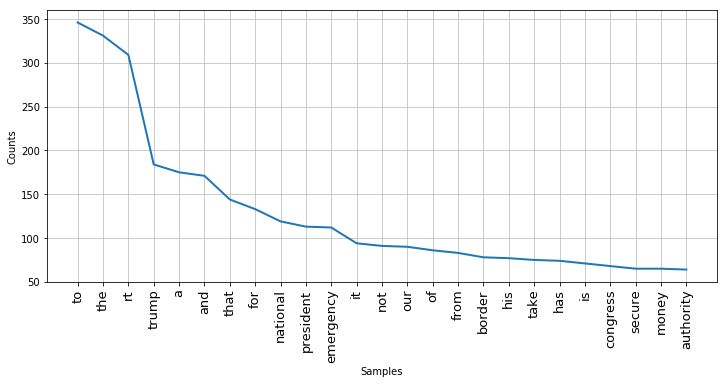

In [17]:
# plot word frequency distribution of first few words
import nltk
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

Text(0.5,0,'Word Rank')

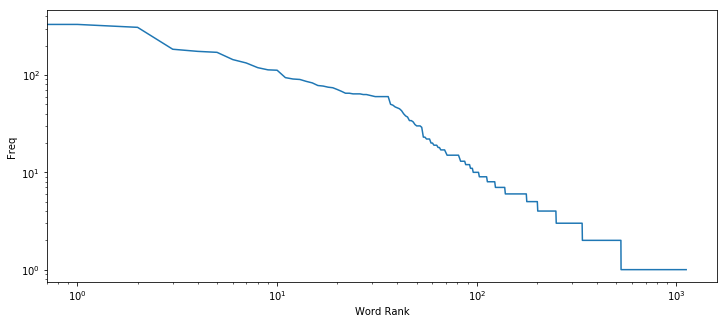

In [18]:
# log-log of all words
from collections import Counter
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

Finally, I've got my cleaned data as we know all these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. 

In [19]:
# the dimension changed with the addition of word and char count
print(tweetdf.shape)
print(list(tweetdf))
#tweetdf['cleanedText'] # appended the results into original data frame data frame 

(500, 15)
['tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation', 'word_count', 'char_count', 'cleanedText']


Now, moving towards Bag of Words - Vectorization. Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

In [20]:
# Instantiating the count vectorizer with all default parameter settings

# Default settings – binary= False, lowercase = True, stop_words = None, max_df =1.0, min_df = 1. 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(binary=False) 

#apply the transformation
cv_default = cv.fit_transform(tweetdf['cleanedText']) # bag of words
print(cv_default.shape)

# "bag of words"
names = cv.get_feature_names()
count = np.sum(cv_default.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
# following line is getting top 15 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:16]  #arrange by count

(500, 1096)


,count
to,346
the,331
rt,309
trump,184
and,171
that,144
for,133
national,119
president,113
emergency,112


As we can see the above output, feature space has 1096 features where highest occurring word is 'to'-346,'the'-328,'rt'-309.

Now, the top 1 and 2 are 'to' and 'the' these are considered as ‘Stop words’, which are the words that are so generic that we find in any sentences and we are not really interested in them. So we will remove these tokens.

In [21]:
# let's remove sklearn stop words
from sklearn.feature_extraction.text import CountVectorizer

# eliminating skl stop words 
cv1 = CountVectorizer(binary=False, stop_words = "english") 
cv1_skl_stopwords = cv1.fit_transform(tweetdf['cleanedText']) # bag of words
print(cv1_skl_stopwords.shape)
names = cv1.get_feature_names()   #create list of feature names
count = np.sum(cv1_skl_stopwords.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 15 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:16]  


(500, 938)


,count
rt,309
trump,184
national,119
president,113
emergency,112
border,78
congress,68
money,65
secure,65
gave,64


In [22]:
# feature space
#cv1.get_feature_names()
count_df.sort_values(['count'], ascending = False)[50:67] 

,count
lady,9
check,8
people,8
son,8
stupidity,8
laughing,8
kamala,8
45,8
théâtre,7
urgence,7


As it's visible in the above output,commonly occurring words have been removed in a general sense.
Above vectorizer output is showing 939 unique features after removing stop words(english) to reduce redundant data which aren't helpful in getting insights.

### Customized stop words

Let's create a customized stop words to remove commonly occurring words from our text data..

In [23]:
from sklearn.feature_extraction import text #import package

skl_stopwords = text.ENGLISH_STOP_WORDS
#print(skl_stopwords)

from nltk.corpus import stopwords # for excluding the stopwords

#creating an object using the default nltk stopwords
nltk_stopwords = stopwords.words("english") 

In [24]:
# Using sets to do intersections and unions
# Creating two sets to work with

set_a = set(nltk_stopwords) # create a set object from a list
print(type(set_a), len(set_a))


set_b = set(skl_stopwords) # create a set object from a list
print(type(set_b), len(set_b))

<class 'set'> 179
<class 'set'> 318


In [25]:
#Find the intersection of our two sets and show the results
set_c = set(set_a).union(set_b)
print(type(set_c), len(set_c))
#print(set_c)

<class 'set'> 378


In [26]:
#creating a custom stop words list by adding a few terms to the nltk list
 # did is still in feature space
# "author" is representing authority only, 
# so adding  these in remove words words
# I didn't like few word's presence so I removing
removewords = set(['author','john_kissmybot','httpstcodtyqxiqalq','kissmybot'])
my_stopwords = set_c.union(removewords) # all stop words in my_stopwords
#my_stopwords
# Appending removed my_stopwords in my cleaned data frame
tweetdf['cleanedText'] = tweetdf['cleanedText'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))
tweetdf['cleanedText'][:6]

0                                   rt lady 45 kamala laughing stupidity built president
1    rt trump authority declare national emergency secure border congress gave president
2                           alternate reality john bussey live keeps insisting americans
3                         rt dems want feel guilty demanding guilt lay illegals come amp
4                                   rt trump money schools housing gyms saying important
5                                   rt lady 45 kamala laughing stupidity built president
Name: cleanedText, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Now eliminaing customized stop words = my_stopwords
cv2 = CountVectorizer(binary=False, stop_words = my_stopwords) 

cv2_custom_stopwords = cv2.fit_transform(tweetdf['cleanedText'])
print(cv2_custom_stopwords.shape)
names = cv2.get_feature_names()   #create list of feature names
count = np.sum(cv2_custom_stopwords.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 20 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[:20]  

(500, 929)


,count
rt,309
trump,184
national,119
president,113
emergency,112
border,78
congress,68
money,65
secure,65
gave,64


In [28]:
# Feature Space
#cv2.get_feature_names() 

In [29]:
# Now, looking at features that occurred more than 30 count.
from sklearn.feature_extraction.text import CountVectorizer

# Hence adding minimum document frequency as 6.2% besides eliminaing customized stop words
cv3 = CountVectorizer(binary = False, lowercase = False,min_df=0.062,stop_words = my_stopwords)

cv3_maxdf = cv3.fit_transform(tweetdf['cleanedText'])
print(cv3_maxdf.shape)
names = cv3.get_feature_names()   #create list of feature names
count = np.sum(cv3_maxdf.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting all features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)

(500, 19)


,count
rt,309
trump,184
national,119
president,113
emergency,112
border,78
congress,68
secure,65
money,65
authority,64


In [30]:
# cv3 faeture space
#cv3.get_feature_names()

In [31]:
# let's do some stemming 

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 

def stem_text(row):
    
    # following line splits the text apart before stemming
    text = str(row).split() 
    
    #following line tells that we're applying porter stemmer
    stemtext = [ps.stem(word) for word in text] 
    
    # now putting everything back together in stemmedtext
    stemmedtext = ' '.join(stemtext) 
    return stemmedtext

# applying the above function to tweetdf['tweetText] and keeping into tweetdf['stemmed']
tweetdf['stemmed'] = tweetdf['cleanedText'].apply(lambda x: stem_text(x)) 
#print( tweetdf.tweetText[0:5])
#type(tweetdf['stemmed'])
print(tweetdf['stemmed'][0:5])
#print(tweetdf['stemmed'][493:497])

0                              rt ladi 45 kamala laugh stupid built presid
1    rt trump author declar nation emerg secur border congress gave presid
2                     altern realiti john bussey live keep insist american
3                  rt dem want feel guilti demand guilt lay illeg come amp
4                                rt trump money school hous gym say import
Name: stemmed, dtype: object


In [32]:
# appending the stemmed text in my cleaned data frame
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweetdf['cleanedText'][:6].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                              rt ladi 45 kamala laugh stupid built presid
1    rt trump author declar nation emerg secur border congress gave presid
2                     altern realiti john bussey live keep insist american
3                  rt dem want feel guilti demand guilt lay illeg come amp
4                                rt trump money school hous gym say import
5                              rt ladi 45 kamala laugh stupid built presid
Name: cleanedText, dtype: object

In [33]:
#Let's see application of cv2 on the stemmed text
cv2_stemmed = cv2.fit_transform(tweetdf['stemmed'])
print(cv2_stemmed.shape)
names = cv2.get_feature_names()   
count = np.sum(cv2_stemmed.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
#following line is getting top 15 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:16]  

(500, 827)


,count
rt,309
trump,191
nation,123
presid,114
emerg,113
border,78
declar,75
congress,68
say,67
secur,65


In [34]:
#Let's see application of cv3 on the stemmed text
cv3_stemmed = cv3.fit_transform(tweetdf['stemmed'])
print(cv3_stemmed.shape)
names = cv3.get_feature_names()   
count = np.sum(cv3_stemmed.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
#following line is getting top 15 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:16]  

(500, 19)


,count
rt,309
trump,191
nation,123
presid,114
emerg,113
border,78
declar,75
congress,68
say,67
secur,65


### Comparison of un-stemmed and stemmed text
Un-stemmed text (cv2) had 930 features whereas Stemmed text(cv2) has 827 features.

Un-stemmed text (cv3) had 19 features whereas Stemmed text(cv3) has 19 features.
Stemmed text in first instance did good but in second instance, Stemmed text is as good as un-stemmed text!


## Let's move to  Lemmatization #
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, lemmatization is usually preferred  over stemming

In [796]:

#  wnl lemmatizer

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lem_text(row):
    
    # following line splits the text apart before lemmatizing
    text = str(row).split() 
        
    #following line tells that we're applying porter lemmatizing
    lemtext = [wnl.lemmatize(word) for word in text] 
    
    # now putting everything back together in lemmedtext
    lemmedtext = ' '.join(lemtext) 
    return lemmedtext

# applying the above function to tweetdf['tweetText] and keeping into tweetdf['lemmed']
tweetdf['lemmed'] = tweetdf['cleanedText'].apply(lambda x: lem_text(x)) 
print(tweetdf['lemmed'][0:6])

#print(tweetdf['lemmed'][493:497])

0                                   rt lady 45 kamala laughing stupidity built president
1    rt trump authority declare national emergency secure border congress gave president
2                             alternate reality john bussey live keep insisting american
3                         rt dems want feel guilty demanding guilt lay illegals come amp
4                                     rt trump money school housing gym saying important
5                                   rt lady 45 kamala laughing stupidity built president
Name: lemmed, dtype: object


In [797]:
# appending the lemmatized text in my cleaned data frame
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


tweetdf['cleanedText'][:6].apply(lambda x: " ".join([wnl.lemmatize(word) for word in x.split()]))

0                                   rt lady 45 kamala laughing stupidity built president
1    rt trump authority declare national emergency secure border congress gave president
2                             alternate reality john bussey live keep insisting american
3                         rt dems want feel guilty demanding guilt lay illegals come amp
4                                     rt trump money school housing gym saying important
5                                   rt lady 45 kamala laughing stupidity built president
Name: cleanedText, dtype: object

In [805]:
# let's apply vectorization with the same parameter setting(cv2) on lemmatized text 
# and how it changes the feature space using this preprocessing

cv2_lemmed = cv2.fit_transform(tweetdf['lemmed'])
print(cv2_lemmed.shape)
names = cv2.get_feature_names()   
count = np.sum(cv2_lemmed.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 15 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:16]

(500, 889)


,count
rt,309
trump,191
national,119
president,114
emergency,113
border,78
congress,68
money,65
secure,65
authority,64


In [799]:
# let's apply vectorization with the same parameter setting(cv3) on lemmatized text 
# and how it changes the feature space using this preprocessing

cv3_lemmed = cv3.fit_transform(tweetdf['lemmed'])
print(cv3_lemmed.shape)
names = cv3.get_feature_names()   
count = np.sum(cv3_lemmed.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting all features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)

(500, 19)


,count
rt,309
trump,191
national,119
president,114
emergency,113
border,78
congress,68
secure,65
money,65
authority,64


### Comparison of original vectorizer,stemmed and lemmatized text output

Stemmed text(cv2) has 828 features whereas lemmatized text(cv2) has 889 features.
Stemmed text(cv3) has 19 features whereas lemmatized text(cv3) has 19 features.

Here, stemmed text is performing quite better than lemmatization when applying on the whole dataset while it's as good as lemmatized text, in the second instance where my bag of words are extracing words with minimum 6.2% document frequency.


### N-grams are the combination of multiple words used together. 
Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used. Next, I'm extracting bigrams from my cleaned tweet data using the ngrams range parameter to see any useful or valuable combination lying in there

In [800]:
# Addition of ngram range as parameter in cv4
from sklearn.feature_extraction.text import CountVectorizer

# let's add ngram_range (1,2) to fetch all the occurrences of unigram and bigram length tokens in the tweet
# also not to escape any meaningful combination in the content
cv4 = CountVectorizer(binary=False,min_df=.062,ngram_range = (1,2), stop_words = my_stopwords) 

cv4_ngram = cv4.fit_transform(tweetdf['cleanedText'])
print(cv4_ngram.shape)
names = cv4.get_feature_names()   #create list of feature names
count = np.sum(cv4_ngram.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 25 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:26]  

(500, 36)


,count
rt,309
trump,184
rt trump,122
national,119
president,113
emergency,112
national emergency,110
border,78
congress,68
money,65


### Addition of ngram_range(1,2) doesn't look very useful, it's just creating repetition of words as can be seen in above vectorizer output. Feature space increased by 17 with the use of unigram and bigram length tokens while keeping rest of the parameter same as cv3. Therefore, I'd rather not use for it's not helping me in finding my insight.

--------------------------------------**-----------------------------------------------------**--------------------------------------------------------**------------------------------------------------**

In [801]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(tweetdf['cleanedText'][:6])

0                                   rt lady 45 kamala laughing stupidity built president
1    rt trump authority declare national emergency secure border congress gave president
2                           alternate reality john bussey live keeps insisting americans
3                         rt dems want feel guilty demanding guilt lay illegals come amp
4                                   rt trump money schools housing gyms saying important
5                                   rt lady 45 kamala laughing stupidity built president
Name: cleanedText, dtype: object


### Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.
It denotes the contribution of the word to the document i.e words relevant to the document should be frequent. eg: A document about border, president,emergency should contain the word ‘border, president,emergency’ in large number.

In [719]:
# term frequency table of a tweet
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = (tweetdf['cleanedText'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


,words,tf
0,national,1
1,secure,1
2,gave,1
3,border,1
4,president,1
5,congress,1
6,authority,1
7,emergency,1
8,declare,1
9,trump,1


Above output is showing term frequency for second tweet in the data frame.

### The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

In [720]:
#  inverse document frequency (IDF) 
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(tweetdf.shape[0]/(len(tweetdf[tweetdf['cleanedText'].str.contains(word)])))

tf1 


,words,tf,idf
0,national,1,1.435485
1,secure,1,2.040221
2,gave,1,2.055725
3,border,1,1.845160
4,president,1,1.478410
5,congress,1,1.980502
6,authority,1,2.055725
7,emergency,1,1.496109
8,declare,1,1.966113
9,trump,1,0.967584


In [721]:
# The more the value of IDF, the more unique is the word.
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,national,1,1.435485,1.435485
1,secure,1,2.040221,2.040221
2,gave,1,2.055725,2.055725
3,border,1,1.845160,1.845160
4,president,1,1.478410,1.478410
5,congress,1,1.980502,1.980502
6,authority,1,2.055725,2.055725
7,emergency,1,1.496109,1.496109
8,declare,1,1.966113,1.966113
9,trump,1,0.967584,0.967584


As can be seen that the TF-IDF has penalized words like ‘rt’and 'trump' because they're occurring more often. However, it has given a high weight to “authority” since that will be very useful in determining the sentiment of the tweet. 

In [722]:
# the same result here for the entire data frame based on the same setting as count vectorizer 3
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= my_stopwords, min_df = 0.062)
tfidf_tweet = tfidf.fit_transform(tweetdf['cleanedText'])
print(tfidf_tweet.shape)
tfidf_tweet

pd.DataFrame(tfidf_tweet.toarray(),columns = tfidf.get_feature_names()).head()

(500, 19)


,authority,border,congress,declare,emergency,gave,gyms,housing,illegal,important,money,national,president,rt,saying,schools,secure,trump,wall
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.858744,0.512404,0.000000,0.000000,0.000000,0.000000,0.0
1,0.343637,0.321603,0.336891,0.343637,0.281172,0.343637,0.000000,0.000000,0.0,0.000000,0.000000,0.274383,0.280177,0.167179,0.000000,0.000000,0.341912,0.226101,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390111,0.390111,0.0,0.386058,0.382133,0.000000,0.000000,0.185907,0.388068,0.390111,0.000000,0.251430,0.0


First five rows depiction can be seen above.
TFIDF things to remember:

- Weight is highest when $t$ occurs many times within a small number of documents (thus lending high discriminating power to those documents)


- Weight is lower when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal)


- Weight is lowest when the term occurs in virtually all documents

In [723]:
# the same result here for the entire data frame based on the same setting as count vectorizer 3
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True,use_idf = True, analyzer='word', stop_words= my_stopwords, min_df = 0.062)
tfidf_tweet = tfidf.fit_transform(tweetdf['cleanedText'])
print(tfidf_tweet.shape)
tfidf_tweet

pd.DataFrame(tfidf_tweet.toarray(),columns = tfidf.get_feature_names()).tail()

(500, 19)


,authority,border,congress,declare,emergency,gave,gyms,housing,illegal,important,money,national,president,rt,saying,schools,secure,trump,wall
495,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
496,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
497,0.0,0.000000,0.0,0.0,0.658549,0.0,0.0,0.0,0.0,0.0,0.0,0.642647,0.0,0.391558,0.0,0.0,0.0,0.0,0.0
498,0.0,0.000000,0.0,0.0,0.658549,0.0,0.0,0.0,0.0,0.0,0.0,0.642647,0.0,0.391558,0.0,0.0,0.0,0.0,0.0
499,0.0,0.887279,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.461233,0.0,0.0,0.0,0.0,0.0


Here, last five rows result shows that border,national and emergency will be very useful in determining the sentiment of the tweet.

In [724]:
names_tfidf = tfidf.get_feature_names()   #create list of tfidf feature names
count = np.sum(tfidf_tweet.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names_tfidf, columns = ['count']) # create a dataframe from the list
sorted_count = count_df.sort_values(['count'], ascending = False)  #arrange by count instead
print(sorted_count)

                count
rt         153.698467
trump       60.532375
national    46.213244
president   45.217820
emergency   41.865685
wall        33.743461
border      31.868775
money       26.659939
congress    25.565840
important   25.071322
saying      24.290969
housing     23.413554
gyms        23.413554
schools     23.413554
secure      22.615670
gave        21.997657
declare     21.997657
authority   21.997657
illegal     21.725252


In [725]:
names_cv3 = cv3.get_feature_names()   #create list of feature names
count = np.sum(cv3_maxdf.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names_cv3, columns = ['count']) 
# following line is getting all 23features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)
print(sorted_count)

                count
rt         153.698467
trump       60.532375
national    46.213244
president   45.217820
emergency   41.865685
wall        33.743461
border      31.868775
money       26.659939
congress    25.565840
important   25.071322
saying      24.290969
housing     23.413554
gyms        23.413554
schools     23.413554
secure      22.615670
gave        21.997657
declare     21.997657
authority   21.997657
illegal     21.725252


As can be seen in above two ouputs, weitage count for count vectorizer and term frequency- inverse document frequency vectorizer are same.

## Q1. : 
  •	Answer:  For my 2nd assignment, I've decided to extract tweets featuring '#wall' as part of my job at a news network. Here, my executive has assigned me a task to find public opinion regarding building wall on southern border and what are they talking per se. They’re interested in understanding people sentiment for or against building the wall. So, my task is to do sentiment analysis and come up with top reasons why people believe in building the wall is good or bad for the America. Since, sentiment & emotion add important context to social media analysis, tweets are best indicator of one’s likes, and dislikes based on how many times a particular tweet has been retweeted. Sentiment analysis provide a window into individuals feelings about any topic. Similarly, the sentiments of people can be evaluated regarding building wall by dissecting the tweets to understand the views presented thru positive and negative statements. As part of my observation, people are targeting political personality which likely show their favor to a particular political party and eventually their support for wall. Also, they are sharing their points how this could be good or bad based on their social status and going to affect common people and economy. 
 # ****************
•	First, I imported the wall.csv file where tweetText column of tweet data frame is being chosen to do sentiment analysis. I started with one of the most basic features that is the number of words in each tweet with the basic intuition of negative sentiments having lesser amount of words than the positive ones. Next, number of characters in each tweet is counted with the same intuition. In both cases, findings showed that 4th tweet is on top based on for first five tweets output. As part of preprocessing, data cleaning started with converting to lowercase which avoids having multiple copies of the same words followed by removing punctuation for it doesn’t add any extra information while treating text data, thereby, removing all instances of it will help us reduce the size of the tweet data.I had to customize few replacements in order to get desired result and removed rare words which wasn’t very meaningful to me. Next, duplicates tweets were dropped which could be work of twitter bots as we read in one of the articles. Removing stop words really helped in reducing our vocabulary clutter so that the features produced in the end are more effective. twitter messages are short by design and the above methods may not work so well because they essentially shorten words to their base words. Also, created customized stop words by combining sklearn stop words, nltk stop words and few words which I could see unnecessary repeated. At last, techniques like stemming and lemmatizing were not very useful on twitter data as twitter messages are short by design and these methods may not work so well because they essentially shorten words to their base words. 
# ****************
•	I’d definitely select built-in plus customized stop words as one of the fundamental preprocessing tasks. Few repeated words (httpstcodtyqxiqalq, john_kissmybot) with high occurrence count in my feature space couldn’t be removed even after doing entire preprocessing, so I added those in stop words. Punctuation removal did really help in clearing the picture but couldn’t get a perfect set of clean up as some cleanup steps introduced some flaws in the data removing, so I customized the way feature space collected useful tokens. Removal of rare words and dropping duplicate tweets also worked which I guess it worked but not very clear about it, I’d have to spend some time look closely. Stemming worked well when fetching all features but if I’m interested in high feature count then I’d not prefer it. Same goes to Lemmation based on my output.

------------------ ------------------------------------------------------------------------------------------
###      T2. Appended data frame:

In [503]:
# Original text column in the tweet dataframe
# first 5 rows
#print(tweetdf['tweetText'][:6])

0    RT @Navy_Lady_45: Kamala,\r\n\r\nEveryone is laughing at your stupidity. The #Wall will be built and you will never be President.\r\n\r\n#Trump2020\r\n#Tr…
1             RT @John_KissMyBot: Trump Has The Authority To Declare A ‘National Emergency’ To Secure Our Border\r\n\r\nCongress Gave The President That Author…
2                   In what alternate reality does John Bussey live? He keeps insisting that most Americans are against the #Wall and t… https://t.co/dTYqxiqalq
3               RT @JAMsMa: Dems want us to feel guilty for demanding a #Wall. How much guilt do they lay on illegals who come here to take what's OURS &amp; s…
4                   RT @RepCohen: Trump to take money for his #wall from #military schools,housing, and gyms saying “it didn’t seem that important to him.” And…
5    RT @Navy_Lady_45: Kamala,\r\n\r\nEveryone is laughing at your stupidity. The #Wall will be built and you will never be President.\r\n\r\n#Trump2020\r\n#Tr…
Name: tweetText, dtype: object


In [506]:
# Converted to lowercase, Same rows in lowercase and difference can be seen
#print(tweetdf['tweetText'][:6])

0          rt @navy_lady_45: kamala, everyone is laughing at your stupidity. the #wall will be built and you will never be president. #trump2020 #tr…
1         rt @john_kissmybot: trump has the authority to declare a ‘national emergency’ to secure our border congress gave the president that author…
2        in what alternate reality does john bussey live? he keeps insisting that most americans are against the #wall and t… https://t.co/dtyqxiqalq
3    rt @jamsma: dems want us to feel guilty for demanding a #wall. how much guilt do they lay on illegals who come here to take what's ours &amp; s…
4        rt @repcohen: trump to take money for his #wall from #military schools,housing, and gyms saying “it didn’t seem that important to him.” and…
5          rt @navy_lady_45: kamala, everyone is laughing at your stupidity. the #wall will be built and you will never be president. #trump2020 #tr…
Name: tweetText, dtype: object


In [544]:
#I’ve been appending while doing preprocessing:
# first 5 rows
# the dimension changed with the addition of word and char count
print(tweetdf.shape)
print(list(tweetdf))
#tweetdf['cleanedText'] # appended the results into original data frame data frame 
#print(tweetdf['cleanedText'][:6])


(500, 15)
['tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation', 'word_count', 'char_count', 'cleanedText']
0                           rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president
1    rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author
2                         in what alternate reality does john bussey live he keeps insisting that most americans are against the and t
3        rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s
4                        rt trump to take money for his from schools housing and gyms saying it did not seem that important to him and
5                           rt lady 45 kamala everyone is laughing at your stupidity 

### I had to face mishap when I stemmed my data before cleaning my text which I removed in my final output.
### final output is my success !
For example:

In [546]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 

def stem_text(row):
    
    # following line splits the text apart before stemming
    text = str(row).split() 
    
    #following line tells that we're applying porter stemmer
    stemtext = [ps.stem(word) for word in text] 
    
    # now putting everything back together in stemmedtext
    stemmedtext = ' '.join(stemtext) 
    return stemmedtext

# applying the above function to tweetdf['tweetText] and keeping into tweetdf['stemmed']
tweetdf['stemmed'] = tweetdf['tweetText'].apply(lambda x: stem_text(x)) 
#print( tweetdf.tweetText[0:5])
#type(tweetdf['stemmed'])
#print(tweetdf['stemmed'][0:5])

0                         rt ladi 45 kamala everyon is laugh at your stupid the will be built and you will never be presid
1       rt kissmybot trump ha the author to declar a nation emerg to secur our border congress gave the presid that author
2                      in what altern realiti doe john bussey live he keep insist that most american are against the and t
3    rt dem want us to feel guilti for demand a how much guilt do they lay on illeg who come here to take what s our amp s
4                          rt trump to take money for hi from school hous and gym say it didnt seem that import to him and
Name: stemmed, dtype: object


In [547]:
# how does that affect the feature list

cv2_dm = cv2.fit_transform(tweetdf['stemmed'])
print(cv2_dm.shape)
names = cv2.get_feature_names()   
count = np.sum(cv2_dm.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
#following line is getting top 15 features by count instead of alphabetical
#count_df.sort_values(['count'], ascending = False)[0:15]  

(500, 899)


,count
rt,309
trump,191
nation,123
presid,114
emerg,113
border,78
hi,77
declar,75
ha,74
congress,68


### Even If I did custom replacment for these words, that wouldn't be meaningful as can be seen below :) 

So, I'd just ignore these words from my analysis

In [548]:
import re

stem_dict = { 'hi':' his', 'ha':'has','thi':'this'}

def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [549]:
tweetdf['stemmedtext'] = tweetdf['tweetText'].apply(lambda x: multiple_replace(stem_dict, x))
#tweetdf['stemmedtext'][0:5] 

0                           rt lady 45 kamala everyone is laug hisng at your stupidity the will be built and you will never be president
1    rt kissmybot trump hass the authority to declare a national emergency to secure our border congress gave the president thast author
2                         in whast alternate reality does john bussey live he keeps insisting thast most americans are against the and t
3         rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take whast s ours amp s
4                      rt trump to take money for  hiss from schools housing and gyms saying it didnt seem thast important to  hism  and
Name: stemmedtext, dtype: object

### Few ones to notice 'that' became thast,'what' = whast,'him' = hism,'has' = hass, 'his' = hiss   
### Silly, isn't it? 

In [551]:
# Still let's see change of the feature space using this preprocessing

cv2_dm = cv2.fit_transform(tweetdf['stemmedtext'])
print(cv2_dm.shape)
names = cv2.get_feature_names()   
count = np.sum(cv2_dm.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
#count_df.sort_values(['count'], ascending = False)[0:30] 

(500, 999)


,count
rt,309
trump,184
thast,144
national,119
president,113
emergency,112
border,78
hiss,77
hass,74
congress,68


### Comparing cv2 on both stemmed text
Vectorizer output and feature space:
using tweetdf['stemmed'] = 899
using tweetdf['stemmedtext'] = 999
It didn't improve feature space instead feature space increased by 100!

# Q2.
•	Yes, I’d say results did reflect my expectation based on my preprocessing selection. Firstly, transforming tweets into lower case helped avoiding having multiple copies of the same words, for example, while calculating the word count, ‘Emergency’ and ‘emergency’ were taken as different words, thus, it reduced repetition. Secondly, using punctuation removal really eliminated all special characters, quotation marks plus URL links and third was stop word removal made a quite a presence in the feature space and common words were almost gone. Stemming is useful when I’m considering features with low document frequency and deep cleaning but if I’m interested in only top occurring words, stemming might not be helpful and lemmatization can be more useful with the use of POS tagging.
•	I observed mishap when I stemmed my data before cleaning my text (on original data) where stemming output created few words such as hi, ha, thi which didn't make sense. Their presence in the feature space weren't useful for my research per se and even I tried customizing replacing them but of no use. Hence, I’ve started afresh with cleansing of data first and keep appending data frame and stemmed on the cleaned data and it depicted what I needed. Other mishaps I encountered are few irrelevant tokens such as 'john_kissmybot','httpstcodtyqxiqalq','kissmybot' etc. They occurred so many times that they were coming on top feature list and so I went ahead and included them in stop words, haven’t got any better option yet. 


**------------------------------------**-----------------------------**----------------------------**-------------------------------**
#### T3 :
Sentiment dictionary used here are afinn,hl_sent, Gi dictionary, and afinn2.

In [729]:
# Using afinn dictionaries to assign a value 
afinn = {}
for line in open('C:/Users/email/Downloads/'+"AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [730]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# returning a label

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    

In [731]:
tweetdf['afinn'] = tweetdf.tweetText.apply(lambda x: afinn_sent(x))
print(type(tweetdf.tweetText))

<class 'pandas.core.series.Series'>


In [732]:
tweetdf.iloc[0:5][['tweetText','afinn']]

,tweetText,afinn
0,rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president,Positive
1,rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author,Positive
2,in what alternate reality does john bussey live he keeps insisting that most americans are against the and t,Neutral
3,rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s,Negative
4,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive


In [733]:
tweetdf['afinn'] = tweetdf.cleanedText.apply(lambda x: afinn_sent(x))
print(type(tweetdf.cleanedText))

<class 'pandas.core.series.Series'>


In [734]:
tweetdf.iloc[0:5][['cleanedText','afinn']]

,cleanedText,afinn
0,rt lady 45 kamala laughing stupidity built president,Positive
1,rt trump authority declare national emergency secure border congress gave president,Positive
2,alternate reality john bussey live keeps insisting americans,Neutral
3,rt dems want feel guilty demanding guilt lay illegals come amp,Negative
4,rt trump money schools housing gyms saying important,Positive


### I tried afinn sentiments on both original and cleaned text and found out that results are same fo first five rows.

In [735]:
#some sort into buckets
HLpos = [line.strip() for line in  open('C:/Users/email/Downloads/'+'HLpos.txt','r')]
HLneg = [line.strip() for line in  open('C:/Users/email/Downloads/' +'HLneg.txt','r',encoding = 'latin-1')]
print("HL pos  size: " + str(len(HLpos)))
print(HLpos[0:10])
print("HL neg  size: " + str(len(HLneg)))
print(HLneg[0:10])

HL pos  size: 2006
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
HL neg  size: 4783
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [736]:

# trying a different measure using a different dictionary

def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
     
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

In [737]:
#takes a little longer - needs to check multiple lists
tweetdf['hlsent'] = tweetdf.cleanedText.apply(lambda x: hl_sent(x))

In [738]:
tweetdf.iloc[0:10][['cleanedText','afinn', 'hlsent']]

,cleanedText,afinn,hlsent
0,rt lady 45 kamala laughing stupidity built president,Positive,Negative
1,rt trump authority declare national emergency secure border congress gave president,Positive,Positive
2,alternate reality john bussey live keeps insisting americans,Neutral,Neutral
3,rt dems want feel guilty demanding guilt lay illegals come amp,Negative,Negative
4,rt trump money schools housing gyms saying important,Positive,Positive
5,rt lady 45 kamala laughing stupidity built president,Positive,Negative
6,want wants issue wall built think tha,Positive,Negative
7,rt trump money schools housing gyms saying important,Positive,Positive
8,rt la révolution est féministe come,Neutral,Neutral
9,rt trump money schools housing gyms saying important,Positive,Positive


In [739]:
#takes a little longer - needs to check multiple lists
tweetdf['hlsent'] = tweetdf.cleanedText.apply(lambda x: hl_sent(x))

In [740]:
tweetdf.iloc[0:10][['cleanedText','afinn', 'hlsent']]

,cleanedText,afinn,hlsent
0,rt lady 45 kamala laughing stupidity built president,Positive,Negative
1,rt trump authority declare national emergency secure border congress gave president,Positive,Positive
2,alternate reality john bussey live keeps insisting americans,Neutral,Neutral
3,rt dems want feel guilty demanding guilt lay illegals come amp,Negative,Negative
4,rt trump money schools housing gyms saying important,Positive,Positive
5,rt lady 45 kamala laughing stupidity built president,Positive,Negative
6,want wants issue wall built think tha,Positive,Negative
7,rt trump money schools housing gyms saying important,Positive,Positive
8,rt la révolution est féministe come,Neutral,Neutral
9,rt trump money schools housing gyms saying important,Positive,Positive


### Again, checked sentiments on both the data frames and results are same for first 10 rows, looks like cleaning wasn't needed ...just kidding.. may be helpful for modeling

In [741]:
#new GI dictionary
import re

GI_frame = pd.read_csv('C:/Users/email/Downloads/' +'inquirerbasic.csv',
                        usecols=[0,1,2,3,8,10,184,185], na_values = [" "])

GI_frame.fillna('', inplace=True)
print(GI_frame.shape)

# get rid of multiple counts
GI_frame['NewEntry'] = GI_frame['Entry'].str.extract('([A-Z]\w{0,})', expand = False)



(11788, 8)


In [742]:
# let's see first 10 tweets
GI_frame.head(10)


,Entry,Source,Positiv,Negativ,Strong,Weak,Othtags,Defined,NewEntry
0,A,H4Lvd,,,,,DET ART,| article: Indefinite singular article--some or any one,A
1,ABANDON,H4Lvd,,Negativ,,Weak,SUPV,|,ABANDON
2,ABANDONMENT,H4,,Negativ,,Weak,Noun,|,ABANDONMENT
3,ABATE,H4Lvd,,Negativ,,,SUPV,|,ABATE
4,ABATEMENT,Lvd,,,,,Noun,,ABATEMENT
5,ABDICATE,H4,,Negativ,,Weak,SUPV,|,ABDICATE
6,ABHOR,H4,,Negativ,,,SUPV,|,ABHOR
7,ABIDE,H4,Positiv,,,,SUPV,|,ABIDE
8,ABILITY,H4Lvd,Positiv,,Strong,,Noun,,ABILITY
9,ABJECT,H4,,Negativ,,Weak,Modif,|,ABJECT


In [743]:
#let's create lists: pos, neg, strong, weak

GIlist = GI_frame['NewEntry'].tolist()
GIlist = list(map(lambda x: str(x).lower(), GIlist))
GIset = set(GIlist)
print("GI dictionary size: " + str(len(GIlist)) + " words of which " +str(len(GIset))+ " are unique.")


GIpos = GI_frame['NewEntry'][GI_frame['Positiv'].str.contains('Positiv')].tolist()
GIneg = GI_frame['NewEntry'][GI_frame['Negativ'].str.contains('Negativ')].tolist()
GIstrong = GI_frame['NewEntry'][GI_frame['Strong'].str.contains('Strong')].tolist()
GIweak = GI_frame['NewEntry'][GI_frame['Weak'].str.contains('Weak')].tolist()
GIpos = list(map(lambda x: str(x).lower(), GIpos))
GIneg = list(map(lambda x: str(x).lower(), GIneg))
GIstrong = list(map(lambda x: str(x).lower(), GIstrong))
GIweak = list(map(lambda x: str(x).lower(), GIweak))

print("Positive words: " + str(len(GIpos)))
print("Negative words: " + str(len(GIneg)))
print("Strong words: "+ str(len(GIstrong)))
print("Weak words: " + str(len(GIweak)))


GI dictionary size: 11788 words of which 8559 are unique.
Positive words: 1915
Negative words: 2291
Strong words: 1902
Weak words: 755


In [744]:

# Decisions will need to be made on how to deal with these

print(set(GIpos).intersection(set(GIneg)))
print("~~~~~~")
print (set(GIstrong).intersection(set(GIweak)))

{'pass', 'even', 'mind', 'make', 'particular', 'fine', 'board', 'hand', 'laugh', 'hit', 'deal', 'help', 'arrest', 'fun', 'order', 'matter'}
~~~~~~
{'scared', 'broke', 'lower', 'patient', 'limit', 'support', 'control', 'upset', 'bound', 'founder', 'shock', 'break', 'order', 'restrict', 'long', 'fear', 'wound', 'stick', 'split', 'look', 'convict', 'pass', 'run', 'whip', 'divide', 'excuse', 'occasion', 'beat', 'scare', 'ruin', 'press', 'hard', 'few', 'blind', 'surround', 'shift', 'can'}


In [745]:
#Let's take the most common use based on info in the "defined" column
# We could also use the POS here

#define function to pull out percent
def get_digits(text):
    temp_num = ''.join(list(filter(str.isdigit, text)))
    if temp_num == '':
        temp_num = 100
    return temp_num

#create new column for digits - not strictly necessary since it's not relevant for all entries but fastest way
GI_frame['Percent'] = GI_frame['Defined'].map(lambda x: get_digits(x))

print(GI_frame.shape)

(11788, 10)


In [746]:
print(GI_frame.head(10))

         Entry Source  Positiv  Negativ  Strong  Weak  Othtags  \
0            A  H4Lvd                                  DET ART   
1      ABANDON  H4Lvd           Negativ          Weak     SUPV   
2  ABANDONMENT     H4           Negativ          Weak     Noun   
3        ABATE  H4Lvd           Negativ                   SUPV   
4    ABATEMENT    Lvd                                     Noun   
5     ABDICATE     H4           Negativ          Weak     SUPV   
6        ABHOR     H4           Negativ                   SUPV   
7        ABIDE     H4  Positiv                            SUPV   
8      ABILITY  H4Lvd  Positiv           Strong           Noun   
9       ABJECT     H4           Negativ          Weak    Modif   

                                                   Defined     NewEntry  \
0  | article: Indefinite singular article--some or any one            A   
1                                                        |      ABANDON   
2                                               

In [747]:
#pull out only the versions of terms used more than 50% of the time
GI_frame.Percent.astype(int) > 50
GI_frame = GI_frame[GI_frame.Percent.astype(int) > 50]
print(GI_frame.shape)

(9085, 10)


In [748]:
GIlist = GI_frame['NewEntry'].tolist()
GIlist = list(map(lambda x: str(x).lower(), GIlist))
GIset = set(GIlist)
print("GI dictionary size: " + str(len(GIlist)) + " words of which " +str(len(GIset))+ " are unique.")


GIpos = GI_frame['NewEntry'][GI_frame['Positiv'].str.contains('Positiv')].tolist()
GIneg = GI_frame['NewEntry'][GI_frame['Negativ'].str.contains('Negativ')].tolist()
GIstrong = GI_frame['NewEntry'][GI_frame['Strong'].str.contains('Strong')].tolist()
GIweak = GI_frame['NewEntry'][GI_frame['Weak'].str.contains('Weak')].tolist()
GIpos = list(map(lambda x: str(x).lower(), GIpos))
GIneg = list(map(lambda x: str(x).lower(), GIneg))
GIstrong = list(map(lambda x: str(x).lower(), GIstrong))
GIweak = list(map(lambda x: str(x).lower(), GIweak))

print("Positive words: " + str(len(GIpos)))
print("Negative words: " + str(len(GIneg)))
print("Strong words: "+ str(len(GIstrong)))
print("Weak words: " + str(len(GIweak)))

GI dictionary size: 9085 words of which 8439 are unique.
Positive words: 1597
Negative words: 1971
Strong words: 1418
Weak words: 611


In [749]:
# We fixed the orientation duplication but didn't deal with the strength clashes.  

print(set(GIpos).intersection(set(GIneg)))
print("~~~~~~")
print (set(GIstrong).intersection(set(GIweak)))

set()
~~~~~~
{'founder', 'excuse', 'split', 'support', 'convict', 'can'}


In [750]:
#let's create index


def gi_sent(inputstring, show = None):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        #create scalar for strong and weak words.  Strong words double, weak words add half
        if GIstrong.count(word):
            scale = 2
            if show != None:
                print("Strong: " + word) 
        elif GIweak.count(word):
            if show != None: 
                print("Weak: " + word)
            scale = 0.5
        else:
            scale = 1
            
        if GIpos.count(word):
            if show != None:
                print("Postive: " + word ) 
            poscount +=1*scale
        elif GIneg.count(word):
            if show != None:
                print("Negative: " + word )
            negcount +=1*scale
            
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

In [751]:
# try GI on original tweet data frame
tweetdf['gisent'] = tweetdf.tweetText.apply(lambda x: gi_sent(x))

In [752]:
tweetdf.iloc[0:10][['tweetText','afinn', 'hlsent', 'gisent']]

,tweetText,afinn,hlsent,gisent
0,rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president,Positive,Negative,Negative
1,rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author,Positive,Positive,Positive
2,in what alternate reality does john bussey live he keeps insisting that most americans are against the and t,Neutral,Neutral,Negative
3,rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s,Negative,Negative,Negative
4,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive
5,rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president,Positive,Negative,Negative
6,does not want the he wants it as a issue if the wall was built do you think tha,Positive,Negative,Neutral
7,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive
8,rt la révolution est féministe come on,Neutral,Neutral,Neutral
9,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive


In [753]:
# more complicated sentiment calculations

#amplification and negation words from qdap
negate = ["aint", "arent","cant", "couldnt" , "didnt" , "doesnt" ,"dont" ,"hasnt" , "isnt" ,"mightnt" , "mustnt" ,"neither" ,"never", "no" ,"nobody" , "nor", "not" , "shant", "shouldnt", "wasnt" , "werent" ,"wont", "wouldnt"]
amplify = ["acute" ,"acutely", "certain", "certainly" ,"colossal", "colossally","deep" , "deeply" , "definite","definitely" ,"enormous","enormously" , "extreme", "extremely" ,"great","greatly" ,"heavily", "heavy", "high","highly" ,"huge","hugely" , "immense", "immensely" ,"incalculable" ,"incalculably","massive", "massively", "more","particular" ,"particularly","purpose", "purposely", "quite" ,"real" ,"really","serious", "seriously", "severe","severely" ,"significant" ,"significantly","sure","surely" , "true" ,"truly" ,"vast" , "vastly" , "very"]



In [754]:
def afinn_sent2(inputstring):
    
    sentcount =0
    i=0
    

    for word in inputstring.split():
        prev = inputstring.split().pop(i-1)

        if word in afinn:
            if (prev == 'no'):
                sentcount = sentcount - afinn[word] - afinn[prev]
            elif (prev == 'not'):
                sentcount = sentcount - afinn[word]
            else:
                sentcount = sentcount + afinn[word]
            i+=1
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    
    return sentiment

def hl_sent2(inputstring):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        if HLpos.count(word):
            if negate.count(prev):
                negcount += 1
            elif amplify.count(prev):
                poscount +=2
            else: 
                poscount +=1
        elif HLneg.count(word):
            if negate.count(prev):
                poscount += 1
            elif amplify.count(prev):
                negcount +=2
            else:
                negcount +=1
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

#let's create lists: pos, neg, strong, weak


def gi_sent2(inputstring):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        #create scalar for strong and weak words.  Strong words double, weak words add half
        if GIstrong.count(word):
            scale = 2
        elif GIweak.count(word):
            scale = 0.5
        else:
            scale = 1
            
        if GIpos.count(word):
            if negate.count(prev):
                negcount += 1*scale
            elif amplify.count(prev):
                poscount +=2*scale
            else: 
                poscount +=1*scale
        elif GIneg.count(word):
            if negate.count(prev):
                poscount += 1*scale
            elif amplify.count(prev):
                negcount +=2*scale
            else:
                negcount +=1*scale
            
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    

    #return (negcount, poscount)
    return tone

### Let's see affect of afinn2 on the labels and compare with all other dictionary... 

In [755]:
tweetdf['afinn2'] = tweetdf.tweetText.apply(lambda x: afinn_sent2(x))

In [760]:
tweetdf.iloc[:10][['tweetText','afinn',  'afinn2', 'hlsent','gisent']]

,tweetText,afinn,afinn2,hlsent,gisent
0,rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president,Positive,Positive,Negative,Negative
1,rt kissmybot trump has the authority to declare a national emergency to secure our border congress gave the president that author,Positive,Positive,Positive,Positive
2,in what alternate reality does john bussey live he keeps insisting that most americans are against the and t,Neutral,Neutral,Neutral,Negative
3,rt dems want us to feel guilty for demanding a how much guilt do they lay on illegals who come here to take what s ours amp s,Negative,Negative,Negative,Negative
4,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive,Positive
5,rt lady 45 kamala everyone is laughing at your stupidity the will be built and you will never be president,Positive,Positive,Negative,Negative
6,does not want the he wants it as a issue if the wall was built do you think tha,Positive,Positive,Negative,Neutral
7,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive,Positive
8,rt la révolution est féministe come on,Neutral,Neutral,Neutral,Neutral
9,rt trump to take money for his from schools housing and gyms saying it didnt seem that important to him and,Positive,Positive,Positive,Positive


Above, we can see that it returns a tuple representing negative/positive based on polarity and neutral ,maybe, in case of subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 

In [761]:
tweetdf['afinn2'] = tweetdf.cleanedText.apply(lambda x: afinn_sent2(x))
tweetdf.iloc[:10][['cleanedText','afinn',  'afinn2', 'hlsent','gisent']]

,cleanedText,afinn,afinn2,hlsent,gisent
0,rt lady 45 kamala laughing stupidity built president,Positive,Positive,Negative,Negative
1,rt trump authority declare national emergency secure border congress gave president,Positive,Positive,Positive,Positive
2,alternate reality john bussey live keeps insisting americans,Neutral,Neutral,Neutral,Negative
3,rt dems want feel guilty demanding guilt lay illegals come amp,Negative,Negative,Negative,Negative
4,rt trump money schools housing gyms saying important,Positive,Positive,Positive,Positive
5,rt lady 45 kamala laughing stupidity built president,Positive,Positive,Negative,Negative
6,want wants issue wall built think tha,Positive,Positive,Negative,Neutral
7,rt trump money schools housing gyms saying important,Positive,Positive,Positive,Positive
8,rt la révolution est féministe come,Neutral,Neutral,Neutral,Neutral
9,rt trump money schools housing gyms saying important,Positive,Positive,Positive,Positive


### let's check the difference and number of places of this change

In [757]:
diff = np.where((tweetdf['afinn'] != tweetdf['afinn2']))

In [758]:
print(type(diff))
print(diff)

<class 'tuple'>
(array([ 78,  80, 146, 250, 255, 303, 392], dtype=int64),)


Only 7 tweets out of 500 tweets are different! 

In [759]:
# So how many tweets flipped labels
print(len(diff[0]))


7


# Q3.
Answer:
•	I used afinn dictionary where the simplest sentiment breakdown is to categorize tweets as positive, negative, or neutral. As I see my results, a tuple representing polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment else it’s neutral. Then moved to high level sentiment analysis using hl_sent dictionary which is more profound and wider. Result based on this dictionary looked reasonable. Further, I included GI dictionary and afinn2 as we were instructed in the classroom and lastly compared them all together.
•	I applied all the sentiments defining dictionaries on both my original and cleaned text and found out that results are same for afinn hl_sent, GI_sent and afinn2. Labels for afinn and afinn2 are almost same, High level sentiment (hl_sent) differ with afinn, afinn2, and GI at many places. General Inquirer depicted really unique labels than all three and I’d prefer this one on personal level. 
•	As of now, I’m satisfied with General Inquirer sentiment labels looks more appropriate and would not like to make any changes to my text, dictionary, or sentiment measurement to turn my labels more useful. In the above result, 1st tweet looks negative and gisent says the same, 2nd one is unanimously positive, 3rd tweet does sound little negative, 4th one is unanimously negative, 5th tweet is kind of negative as per my conscience being sarcastic but all labels are positive and finally 6th tweet looked neutral to me. Hence, for now general enquirer sentiments are worth going for.


# T4 
Since, I applied sentiment dictionaries on both my data frames and result was same hence I don’t think changing a preprocessing step in text and dictionary would make difference.

# Q4.
Yes, I may make some changes to sentiment measurement because what the available sentiment analysis are doing is useful for looking at the big picture of people feelings on a topic, but obviously, misses some of the nuance of human emotion.
We should find next level of sentiment analysis tool that can categorize tweets based on specific emotions such as anger, fear, disgust, Joy, surprise, sarcastic and sadness. Using these emotions could give sentiment analysis a deeper context for understanding the public feelings about a topic. Having said that, we can take help of custom categories that we can determine depending on what we’re analyzing. Therefore, looking forward to those Sentiment analysis tools that use machine learning and allow us to create our own categories for researching public opinion on any topic. For example, if a company sells coffee, one could create custom categories specific to an analysis of how whiskey drinkers prefer to make their drinks. Example custom categories could include: neat, on the rocks, shots, craft cocktail (old fashioned, sazerac, etc.), or highball (whiskey coke/ginger).


citations:
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
https://techcrunch.com/2018/10/30/twitters-doubling-of-character-count-from-140-to-280-had-little-impact-on-length-of-tweets/
https://www.crimsonhexagon.com/blog/what-is-sentiment-analysis/
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

# -----------  The End  --------------